In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import statsmodels.formula.api as smf
from helper import normalize, train_linear_regression, plot_rmse_loss_surface_with_arrow, create_formula, downsample_history
import warnings

warnings.filterwarnings('ignore')

<br><br>
# **Table of Contents**

- [Inference and Prediction](#inference-and-prediction)
  - [Dataset Description](#dataset-description)
  - [Logistic Regression for Inference](#logistic-regression-for-inference)
  - [Logistic Regression for Prediction](#logistic-regression-for-prediction)
  - [Overview: Inference vs Prediction](#overview-inference-vs-prediction)
- [Polynomial Regression for Bias-Variance Trade-Off](#polynomial-regression-for-bias-variance-trade-off)
  - [Data Description](#data-description)
  - [High-Bias (Underfitting)](#high-bias-underfitting)
  - [High-Variance Overfitting](#high-variance-overfitting)
  - [Bias-Variance Tradeoff Overview](#bias-variance-tradeoff-overview)
- [Train-Validate-Test Split and Cross-Validation](#train-validate-test-split-and-cross-validation)
  - [Dataset Description](#dataset-description-2)
  - [Why Split Data?](#why-split-data)
  - [Loss Function Optimization](#loss-function-optimization)
  - [Cross-Validation](#cross-validation)

<br><br>
# **Hands-On: Advanced Statistical Learning Concepts**

## Learning Goals
By the end of this session, you will be able to:

- **Distinguish between inference and prediction** 
  - Apply logistic regression for both interpreting coefficients (inference) and assessing prediction accuracy on test data
  - When to interpret model coefficients vs. focus on prediction accuracy

- **Understand bias-variance trade-off** 
  - Use polynomial regression to visualize how model complexity affects bias, variance, and overfitting
  - How increasing complexity reduces bias but can increase variance

- **Implement proper data splitting strategies** 
  - Apply train-validate-test splits and cross-validation using scikit-learn, and know when to use each approach  
  - Best practices for train/validation/test splits and cross-validation

- **Visualize optimization processes** 
  - Observe how loss functions decrease during model training and understand loss landscapes through interactive plots
  - Visual understanding of how algorithms find optimal model parameters

<br><br>
# **Inference and Prediction**

In the following part, we will explain the Characteristics and Differences between Inference and Prediction using Logistic Regression. We will use the same Dataset for both tasks.

### **Dataset Description**

This dataset contains **clinical and genetic data** for 1,000 individuals. The variables include:

- **Age**: Age of the participant (years).
- **Education**: Number of years of formal education.
- **APOE4**: Genetic marker indicating presence (1) or absence (0) of the APOE4 allele, a known genetic risk factor for Alzheimer's.
- **Cognitive_Score**: Score from a cognitive performance test.
- **Alzheimers**: Binary outcome variable indicating diagnosis of Alzheimer's disease (1 = Yes, 0 = No).

In [4]:
# Load the dataset
data = pd.read_csv('alzheimer_logisticregression.csv')

In [3]:
# Show the first few rows of the dataset
data.head()

,Age,Education,APOE4,Cognitive_Score,Alzheimers
0,73,18.198066,0,29.292511,1
1,68,16.773901,0,19.856534,1
2,75,14.178891,0,25.561481,1
3,82,12.059190,0,28.204429,1
4,68,16.094670,1,27.735338,0


In [4]:
# Info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1000 non-null   int64  
 1   Education        1000 non-null   float64
 2   APOE4            1000 non-null   int64  
 3   Cognitive_Score  1000 non-null   float64
 4   Alzheimers       1000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 39.2 KB


In [5]:
# Show statistical summary of the dataset
data.describe()

,Age,Education,APOE4,Cognitive_Score,Alzheimers
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,69.655000,14.212509,0.194000,26.975131,0.409000
std,7.850197,2.992363,0.395627,4.146570,0.491895
min,44.000000,5.178834,0.000000,15.035456,0.000000
25%,64.000000,12.181275,0.000000,24.127411,0.000000
50%,70.000000,14.189231,0.000000,26.994565,0.000000
75%,75.000000,16.186647,0.000000,29.743589,1.000000
max,100.000000,23.579323,1.000000,42.704951,1.000000


In [6]:
# Missing values check
print("\nMissing Values:")
data.isnull().sum()


Missing Values:


Age                0
Education          0
APOE4              0
Cognitive_Score    0
Alzheimers         0
dtype: int64

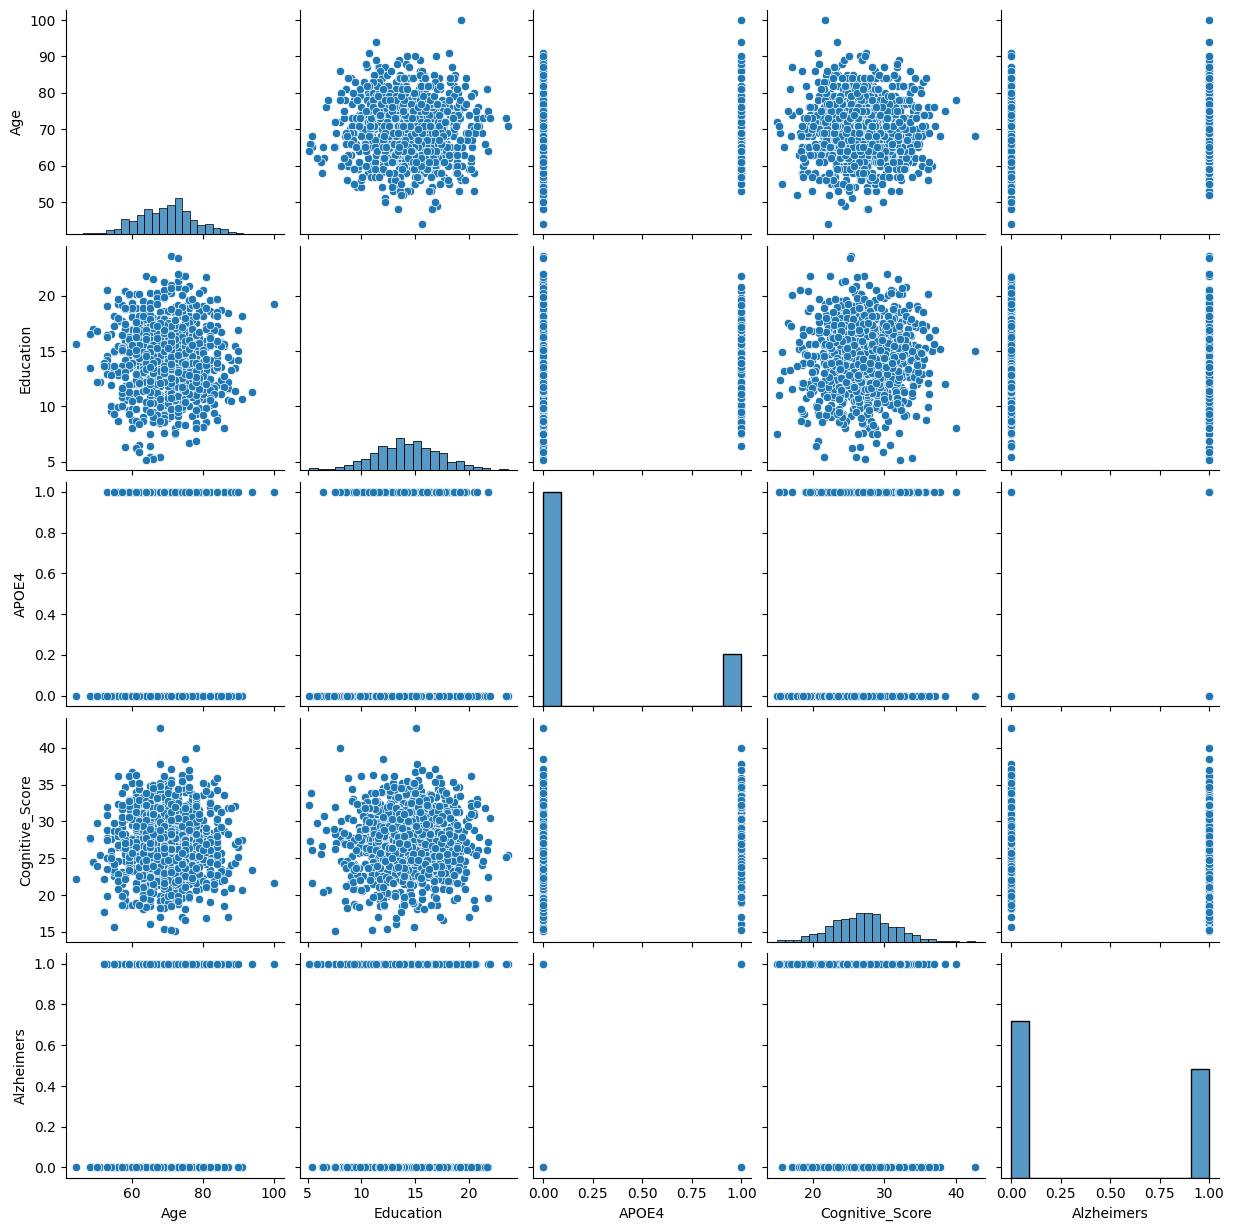

In [7]:
# Show the pairplot
sns.pairplot(data)

We see that a slight majority in this sample does not have Alzheimer, and the majority does not have the APOE4 allele. Otherwise, all continous variables seems normally distributed with no clear outliers visible.

## **Logistic Regression for Inference**

### **Research Question**

> **Which individual-level factors are significantly associated with the probability of developing Alzheimer's disease?**

This analysis aims to evaluate how **age**, **education**, **APOE4 gene status**, and **cognitive test scores** influence the probability of an Alzheimer's diagnosis, using **logistic regression**.

In [ ]:
# fit the logistic regression model using a formula
model = smf.logit('Alzheimers ~ Age + Education + APOE4 + Cognitive_Score', data=data).fit()

# Print the summary of the regression results
model.summary()

Optimization terminated successfully.
         Current function value: 0.607860
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Alzheimers   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      995
Method:                           MLE   Df Model:                            4
Date:                Wed, 11 Jun 2025   Pseudo R-squ.:                  0.1015
Time:                        10:36:09   Log-Likelihood:                -607.86
converged:                       True   LL-Null:                       -676.49
Covariance Type:            nonrobust   LLR p-value:                 1.086e-28
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.8991      0.836     -2.271      0.023      -3.538      -0.260
Age                 0.0639      0.009      6.868      0.000       0.046       0.082
Education          -0.0122      0.023     -0.527      0.598      -0.058       0.033
APOE4               1.1528      0.175      6.588      0.000       0.810       1.496
Cognitive_Score    -0.1115      0.017     -6.415      0.000      -0.146      -0.077
===================================================================================
"""

While the raw coefficients in logistic regression reflect changes in the log-odds of the outcome, these are not easy to interpret. **Therefore, we exponentiate the coefficients to express them as multiplicative changes in the odds of the outcome (i.e., $\frac{P(Y=1)}{1 - P(Y=1)}$)**.

In [9]:
# Extract the coefficients
coefficients = model.params

# Exponentiate the coefficients to get the odds ratios
odds_ratios = np.exp(coefficients)
print("Change in Odds:\n", odds_ratios, "\n")

# Calculate percent change in odds
percent_change = (odds_ratios - 1) * 100
print("Percent change in Odds:\n", percent_change)

Change in Odds:
 Intercept          0.149701
Age                1.065967
Education          0.987861
APOE4              3.167066
Cognitive_Score    0.894453
dtype: float64 

Percent change in Odds:
 Intercept          -85.029939
Age                  6.596709
Education           -1.213922
APOE4              216.706576
Cognitive_Score    -10.554732
dtype: float64


### Logistic Regression Interpretation (Exponentiated Coefficients)
**Outcome: Diagnosis of Alzheimer’s Disease (1 = Alzheimer’s, 0 = No Alzheimer’s)**


- **Age**
  - Coefficient: 0.0639 → Odds Ratio: **1.066**
    - *Remember: Odds Ratio here refers to Odds of one unit increase / Odds*
  - Interpretation: Each additional year of age increases the odds of an Alzheimer’s diagnosis by **6.5%**.
  - P-value: 0.000 → **Highly Statistically significant**

- **Education**
  - Coefficient: -0.0122 → Odds Ratio: **0.988**
  - Interpretation: Each additional year of education slightly reduces the odds of an Alzheimer’s diagnosis by **1.2%**, but this effect is **not statistically significant**.
  - P-value: 	0.598

- **APOE4**
  - Coefficient: 1.1528 → Odds Ratio: **3.167**
  - Interpretation: Individuals with the APOE4 allele have **3.17 times higher odds** (or increased odds by 217%) of being diagnosed with Alzheimer’s.
  - P-value: 0.000 → **Highly statistically significant**

- **Cognitive Score**
  - Coefficient: -0.1115 → Odds Ratio: **0.894**
  - Interpretation: Each unit increase in cognitive score **reduces the odds** of an Alzheimer’s diagnosis by **10.5%**.
  - P-value: 0.000 → **Highly Statistically significant**


## **Logistic Regression for Prediction**

Our goal is to predict outcomes for new, unseen patients who weren't part of our training data. This prediction task focuses on building a model that generalizes well to future cases. Unlike inference, which emphasizes interpreting coefficients and their significance, prediction prioritizes the model's performance on completely new patient data.

### **Research Question**

> **"How accurately can a logistic regression model predict the likelihood of Alzheimer's disease based on clinical and genetic features?"**

### Why Use `scikit-learn` for Prediction?

In this section, we use **`scikit-learn`** for building and evaluating the logistic regression model. While **`statsmodels`** is excellent for interpreting coefficients and statistical significance, **`scikit-learn`** is better suited for **prediction tasks** due to the following:

1. **Prediction Focus**: It’s optimized for evaluating models on unseen data.
2. **Ease of Use**: Built-in tools for train-test split, predictions, and performance metrics.
3. **Efficiency**: Handles larger datasets and faster computations.

Using **`scikit-learn`**, we focus on the practical application of logistic regression for predictive accuracy.

### Train-Test Split

To evaluate the performance of our prediction model, we divide the dataset into two parts: **training data** and **testing data**. The training data is used to build the model, while the testing data is kept aside to assess how well the model performs on unseen data. 

(Note: We will discuss the concept of train-test split and its importance in detail later.)

In [5]:
# Step 1: Split the dataset into training and testing sets

# Define input (X) and outcome (y)
X = data[["Age", "Education", "APOE4", "Cognitive_Score"]]  # Input variables
y = data["Alzheimers"]  # Outcome variable

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Step 2: Fit the logistic regression model 'Alzheimers ~ Age + Education + APOE4 + Cognitive_Score'
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train);

In [9]:
# Step 3: Make predictions on the test data
y_pred = log_reg.predict(X_test)  # Predicted values
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

# Step 3: Make predictions on the test data
y_pred = log_reg.predict(X_test)  # Predicted values
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Predicted probabilities for class 1

# Print predictions and actual values for comparison
print("PREDICTIONS ON TEST DATA")
print("=" * 50)
print(f"{'Index':<6} {'Actual':<8} {'Predicted':<10} {'Probability':<12}")
print("-" * 50)

for i in range(min(20, len(y_test))):  # Show first 20 predictions
    actual = y_test.iloc[i]
    predicted = y_pred[i]
    probability = y_pred_prob[i]
    print(f"{i:<6} {actual:<8} {predicted:<10} {probability:<12.4f}")

print(f"\nShowing first 20 of {len(y_test)} test samples")
print(f"Total test samples: {len(y_test)}")
print(f"Predicted strokes: {sum(y_pred)}")
print(f"Actual strokes: {sum(y_test)}")

PREDICTIONS ON TEST DATA
Index  Actual   Predicted  Probability 
--------------------------------------------------
0      1        1          0.5269      
1      1        1          0.5934      
2      1        0          0.3165      
3      0        0          0.1957      
4      0        0          0.3964      
5      0        1          0.5494      
6      0        0          0.2041      
7      0        0          0.2303      
8      1        1          0.6715      
9      0        0          0.3431      
10     1        0          0.2015      
11     1        1          0.5706      
12     0        0          0.3805      
13     1        0          0.3178      
14     0        0          0.2919      
15     1        0          0.2783      
16     0        0          0.2747      
17     1        1          0.7492      
18     0        0          0.3414      
19     0        0          0.2943      

Showing first 20 of 200 test samples
Total test samples: 200
Predicted strokes: 60


### Evaluating Performance

To assess the quality of our prediction model, we use **Accuracy**. Accuracy is the ratio of correct predictions out of all predictions. For example, an Accuracy of 0.7 equals 70% of correct predictions. In a later lecture, we will introduce new metrics.

We also use a **confusion matrix** to visualize how often the model correctly predicted "No" (true negatives) and "Yes" (true positives), as well as the errors (false positives and false negatives).

Accuracy: 0.64


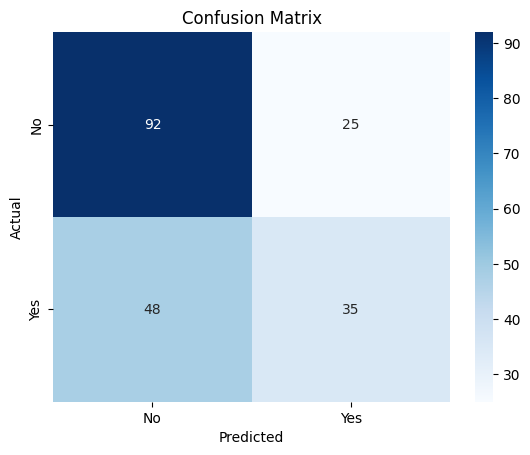

In [10]:
# Step 4: Further evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Overview: Inference vs Prediction
| Aspect               | Inference                                      | Prediction                                   |
|----------------------|------------------------------------------------|---------------------------------------------|
| **Goal**            | Understand relationships between variables   | Build a model to predict new outcomes       |
| **Focus**           | Coefficients and their significance          | Model performance metrics (e.g., accuracy)  |
| **Data**            | Entire dataset                              | Train-test split                            |
| **Evaluation**      | Statistical significance tests              | Metrics like Accuracy    |

Inference helps us understand the underlying relationships in the data, while prediction focuses on making accurate forecasts for new observations.

---
<br><br>
# **Bias-Variance Trade-Off**

### What is Bias-Variance Tradeoff?
When fitting a model, we balance two key sources of error:
- **Bias**: The error introduced by assuming a simple model (e.g., linear) that cannot capture the true relationship in the data (**underfitting**).
- **Variance**: The error introduced by fitting a model that is too complex and overly sensitive to small fluctuations in the training data (**overfitting**).

### Why Does This Matter in Healthcare?
In healthcare, understanding trends (like how ferritin levels change with age) is critical for deriving insights and making decisions. **Overfitting** can lead to models that describe noise instead of meaningful patterns, which can mislead clinical interpretations. The goal is to find a balance between underfitting and overfitting to make accurate and reliable predictions.

### Data Description

The dataset includes measurements of **Ferritin concentration** in males across a continuous age range from **10 to 99 years**. Each observation consists of:

- `Age`: A continuous numeric variable representing the age of the individual (in years).
- `Ferritin`: A numeric variable representing ferritin concentration levels (in µg/L), a biomarker commonly used to assess iron status in the body.


In [ ]:
data = pd.read_csv('ferritin_polynomialregression.csv')

In [15]:
data.head()

,Age,Ferritin
0,10.000000,121.015013
1,12.282051,75.433148
2,14.564103,67.513758
3,16.846154,76.032161
4,19.128205,67.744043


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       40 non-null     float64
 1   Ferritin  40 non-null     float64
dtypes: float64(2)
memory usage: 772.0 bytes


In [17]:
data.describe()

,Age,Ferritin
count,40.000000,40.000000
mean,54.500000,136.895485
std,26.678211,29.968738
min,10.000000,67.513758
25%,32.250000,123.403273
50%,54.500000,147.632773
75%,76.750000,158.593932
max,99.000000,179.275427


In [18]:
print("\nMissing Values:")
data.isnull().sum()


Missing Values:


Age         0
Ferritin    0
dtype: int64

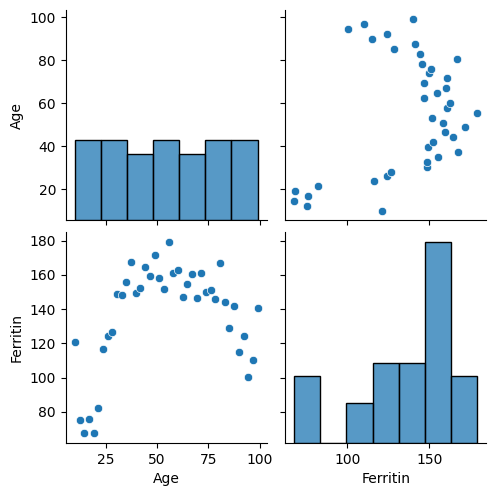

In [19]:
sns.pairplot(data)

## High-Bias (Underfitting)

### Visualizing High Bias with a Linear Model

To illustrate **high bias**, we fit a simple **linear regression model** to the Ferritin-Age data. This model fails to capture the non-linear trend in the data, leading to poor predictions on both training and testing data. If a model is not flexible enough to capture underlying trends in the observed data, it is **underfitting**.


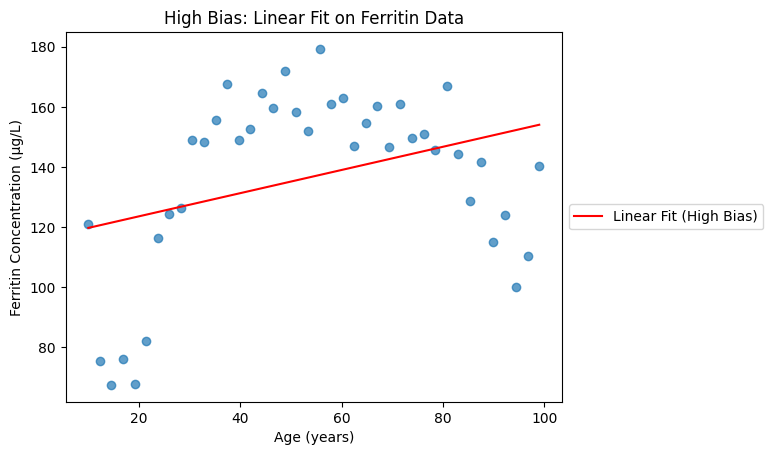

In [20]:
# Fit the linear regression model using statsmodels formula notation
linear_model = smf.ols(formula='Ferritin ~ Age', data=data).fit()

# Predict values using the fitted model
predictions = linear_model.predict(data["Age"])

# Plot the linear fit
plt.scatter(data["Age"], data["Ferritin"], alpha=0.7)
plt.plot(data["Age"], predictions, color="red", label="Linear Fit (High Bias)")
plt.title("High Bias: Linear Fit on Ferritin Data")
plt.xlabel("Age (years)")
plt.ylabel("Ferritin Concentration (µg/L)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Visualizing Low Variance with Linear Models

To illustrate **low variance**, we fit multiple linear models on random subsets of the data. The models are consistent and show little variability, but they all fail to capture the true trend, reinforcing the concept of **high bias**.


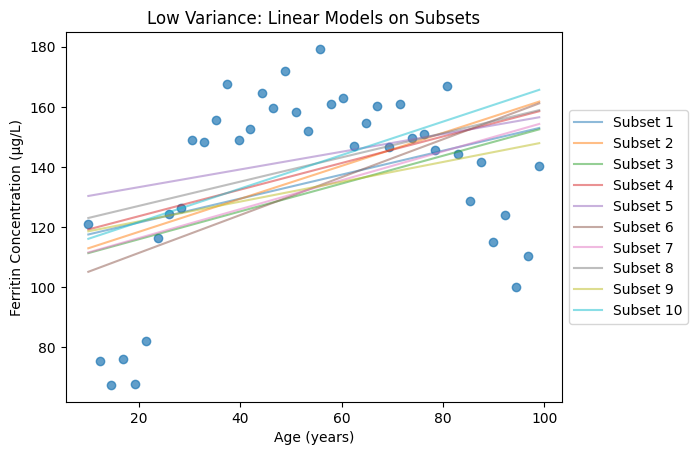

In [ ]:
# Function to fit linear models on subsets using statsmodels
def plot_low_variance_statsmodels(data):
    plt.scatter(data["Age"], data["Ferritin"], alpha=0.7)
    
    for i in range(10):  # Fit 10 models on random subsets
        subset = data.sample(frac=0.7, random_state=i)
        model = smf.ols(formula='Ferritin ~ Age', data=subset).fit()
        predictions = model.predict(data["Age"])
        plt.plot(data["Age"], predictions, alpha=0.5, label=f"Subset {i+1}")
    
    plt.title("Low Variance: Linear Models on Subsets")
    plt.xlabel("Age (years)")
    plt.ylabel("Ferritin Concentration (µg/L)")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

# Plot low variance using statsmodels
plot_low_variance_statsmodels(data)

## High-Variance Overfitting

### Visualizing Low Bias with Higher-Degree Polynomial Models

To illustrate **low bias**, we fit a **15th-degree polynomial regression model** to the Ferritin-Age data. The model captures the non-linear trend very well, reducing bias, but it is very sensible to the data points chosen. When fitting different models on subsets of the data we see a relevant Variance between the model. If a model is too flexible, it capture illusory trends created by noise in the data. This is called **overfitting**.


Ferritin ~ Age_std + I(Age_std**2) + I(Age_std**3) + I(Age_std**4) + I(Age_std**5) + I(Age_std**6) + I(Age_std**7) + I(Age_std**8) + I(Age_std**9) + I(Age_std**10) + I(Age_std**11) + I(Age_std**12) + I(Age_std**13) + I(Age_std**14) + I(Age_std**15)


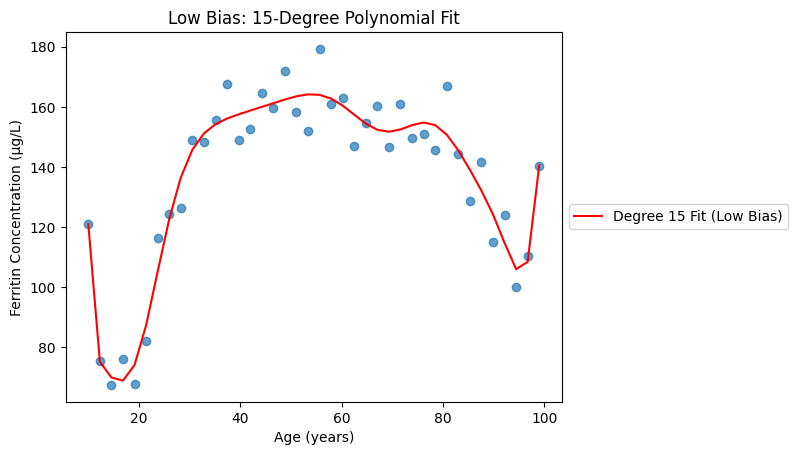

In [ ]:
# Fit the interpolating polynomial
degree = 15

data['Age_std'] = normalize(data['Age'])

formula = create_formula(degree)
print(formula)

# Fit the regression model using statsmodels formula notation
linear_model = smf.ols(formula=formula, data=data).fit()

# Predict values using the fitted model
predictions = linear_model.predict(data["Age_std"])

# Plot the fit
plt.scatter(data["Age"], data["Ferritin"], alpha=0.7)
plt.plot(data["Age"], predictions, color="red", label=f"Degree {degree} Fit (Low Bias)")
plt.title(f"Low Bias: {degree}-Degree Polynomial Fit")
plt.xlabel("Age (years)")
plt.ylabel("Ferritin Concentration (µg/L)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Visualizing High Variance with Higher-Degree Models

To illustrate **high variance**, we fit multiple **15th-degree polynomial models** on random subsets of the data. These models vary significantly, showing how overly complex models are sensitive to small changes in the training data.


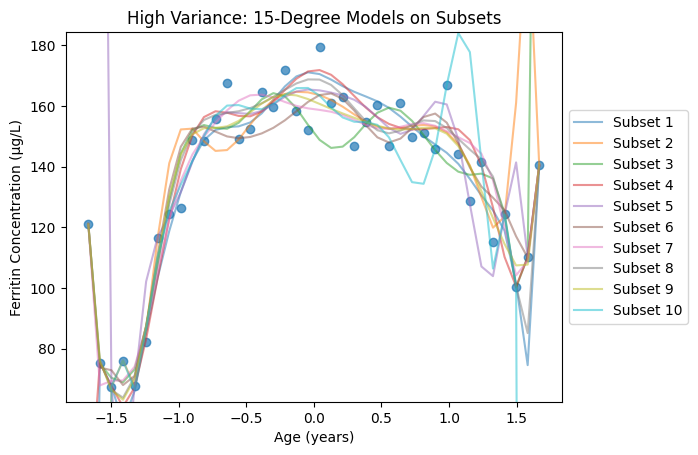

In [ ]:
# Function to fit 15th-degree models on subsets using statsmodels
def plot_high_variance_statsmodels(data, degree):
    plt.scatter(data["Age_std"], data["Ferritin"], alpha=0.7)
    formula = create_formula(degree)

    for i in range(10):  # Fit 10 models on random subsets
        subset = data.sample(frac=0.7, random_state=i)
        model = smf.ols(formula=formula, data=subset).fit()
        predictions = model.predict(data["Age_std"])
        plt.plot(data["Age_std"], predictions, alpha=0.5, label=f"Subset {i+1}")
    
    plt.ylim(data["Ferritin"].min() - 5, data["Ferritin"].max() + 5)
    
    plt.title("High Variance: 15-Degree Models on Subsets")
    plt.xlabel("Age (years)")
    plt.ylabel("Ferritin Concentration (µg/L)")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

# Plot high variance using statsmodels
plot_high_variance_statsmodels(data, degree)


## Bias-Variance Tradeoff Overview
As we increase the polynomial degree, the models become more flexible and better at capturing the training data (lower bias). However, this flexibility comes at the cost of increased sensitivity to noise in the data (higher variance).

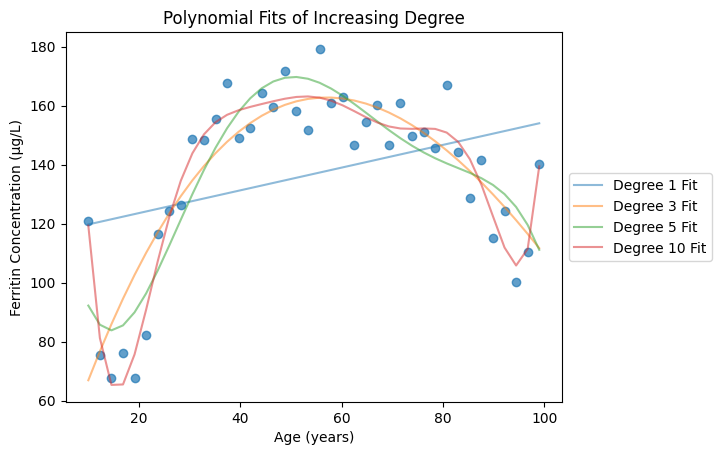

In [24]:
# Polynomial regression function
def fit_and_plot_polynomial(data, degrees):
    plt.scatter(data["Age"], data["Ferritin"], alpha=0.7)

    for degree in degrees:
        
        # Fit the interpolating polynomial
        formula = create_formula(degree)
        model = smf.ols(formula=formula, data=data).fit()
        predictions = model.predict(data["Age_std"])
        plt.plot(data["Age"], predictions, alpha=0.5, label=f"Degree {degree} Fit")

    plt.title("Polynomial Fits of Increasing Degree")
    plt.xlabel("Age (years)")
    plt.ylabel("Ferritin Concentration (µg/L)")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

# Fit and plot for degrees 1, 3, 5, and 10
fit_and_plot_polynomial(data, degrees=[1, 3, 5, 10])

### Generalising to new data

Let's see how different models fit to new datasets of the same distribution.

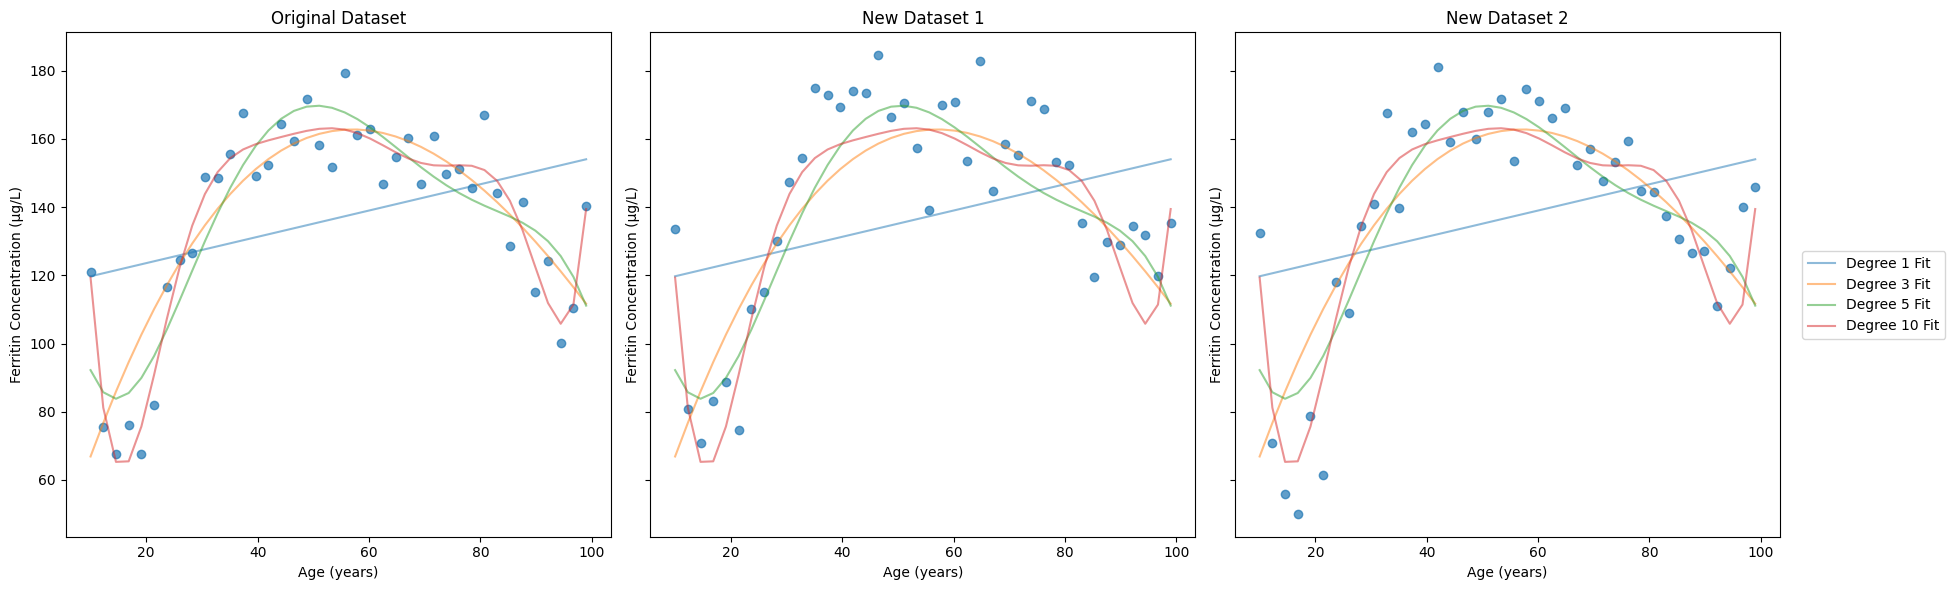

In [ ]:
data = pd.read_csv('ferritin_polynomialregression.csv')
new_data1 = pd.read_csv('ferritin_polynomialregression_1.csv')
new_data2 = pd.read_csv('ferritin_polynomialregression_2.csv')

data['Age_std'] = normalize(data['Age'])
new_data1['Age_std'] = normalize(new_data1['Age'])
new_data2['Age_std'] = normalize(new_data2['Age'])

def fit_and_plot_polynomial(data, new_data1, new_data2, degrees):
  fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

  datasets = [(data, "Original Dataset"), (new_data1, "New Dataset 1"), (new_data2, "New Dataset 2")]

  for i, (dataset, title) in enumerate(datasets):
    axes[i].scatter(dataset["Age"], dataset["Ferritin"], alpha=0.7)
    
    for degree in degrees:
      formula = create_formula(degree)
      model = smf.ols(formula=formula, data=data).fit()  # Fit on the original dataset
      predictions = model.predict(dataset["Age_std"])  # Predict on the current dataset
      axes[i].plot(dataset["Age"], predictions, alpha=0.5, label=f"Degree {degree} Fit")
    
    axes[i].set_title(title)
    axes[i].set_xlabel("Age (years)")
    axes[i].set_ylabel("Ferritin Concentration (µg/L)")

  # Get handles and labels from the last axis (so legend matches plotted lines)
  handles, labels = axes[-1].get_legend_handles_labels()
  fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
  plt.tight_layout()
  plt.show()

# Fit and plot for degrees 1, 3, 5, and 10
fit_and_plot_polynomial(data, new_data1, new_data2, degrees=[1, 3, 5, 10])

**Key Insights from the Bias-Variance Trade-off:**

- **Training vs. Testing Error Patterns**
  - Training error decreases steadily as model complexity increases
  - Testing error first decreases, then rises again due to overfitting
  - Gap between training and testing error indicates overfitting

- **The Sweet Spot**
  - Found where testing error is minimized
  - Represents optimal balance between bias and variance
  - Model captures meaningful patterns without learning noise

- **Practical Implications**
  - Right model complexity is crucial for good generalization
  - Goal: Capture true patterns while avoiding random variations
  - Always validate on unseen data to detect overfitting

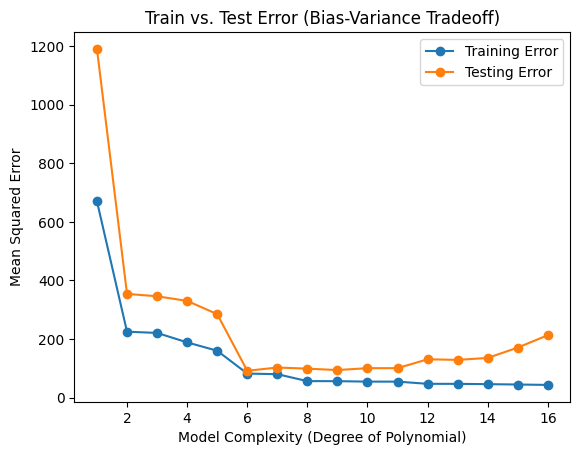

In [ ]:
degree = 16

# Split the data
X = data[["Age"]]
y = data["Ferritin"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate MSE for different polynomial degrees
train_errors = []
test_errors = []

for deg in range(1, degree + 1):  
    # Fit the interpolating polynomial
    X_train_1d = X_train.values.ravel()  # Convert X_train to a 1D array
    X_test_1d = X_test.values.ravel()  # Convert X_test to a 1D array
    
    coefficients = np.polyfit(X_train_1d, y_train, deg=deg)
    polynomial = np.poly1d(coefficients)
    
    # Predict for the train and test datasets
    y_train_pred = polynomial(X_train_1d)
    y_test_pred = polynomial(X_test_1d)
    
    # Calculate mean squared errors
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))
    
# Plot the errors
plt.plot(range(1, degree + 1), train_errors, label="Training Error", marker="o")
plt.plot(range(1, degree + 1), test_errors, label="Testing Error", marker="o")
plt.title("Train vs. Test Error (Bias-Variance Tradeoff)")
plt.xlabel("Model Complexity (Degree of Polynomial)")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

**Key Observations:**

• **Underfitting (Degrees 1-5)**: High training and testing errors indicate the model is too simple to capture the underlying pattern in the data

• **Sweet Spot (Degree 6)**: Training and testing errors are both low and similar, indicating optimal model complexity

• **Overfitting (Degrees 7+)**: Training error continues to decrease while testing error increases, showing the model memorizes training data but fails to generalize to new data

*This demonstrates the bias-variance tradeoff: simpler models have high bias but low variance, while complex models have low bias but high variance.*

---
<br><br>
# **Train-Validate-Test Split**

When building models with complex datasets, it's challenging to know which model and parameters will work best. As we've seen, models can under- or overfit to training data, missing the true underlying patterns.

**Solution**: Split data into 3 parts to train and evaluate models properly:

- **Training Set**: Used to train the model and learn patterns from the data.
- **Validation Set**: Used to evaluate the model during training and guide hyperparameter optimization. This ensures the model is not overfitting the training data.
- **Test Set**: Used only once at the end to provide an unbiased evaluation of the final model's performance on unseen data.


### Dataset Description

Let's look at the Dataset first. We simulate a dataset where the goal is to predict a patient's **Cognitive Score after Therapy** based on:
- **Therapy Duration** (sessions/week),
- **Patient Age** (years),

The dataset includes noise to reflect variability in real-world patient outcomes.

In [27]:
data = pd.read_csv('therapy_influence_regression.csv')

In [ ]:
data.head()

,age,therapy_duration,cognitive_score_after
0,78,91.066289,63.002494
1,68,31.089082,4.021319
2,54,63.933650,72.691510
3,47,40.171920,56.905813
4,60,109.576360,99.023458


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    120 non-null    int64  
 1   therapy_duration       120 non-null    float64
 2   cognitive_score_after  120 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


In [ ]:
data.describe()

,age,therapy_duration,cognitive_score_after
count,120.000000,120.000000,120.000000
mean,59.275000,71.329300,60.342176
std,11.889521,28.046583,31.213184
min,40.000000,20.052038,0.000000
25%,48.000000,46.875450,36.982701
50%,60.000000,70.104625,59.248541
75%,68.000000,91.142980,84.619214
max,79.000000,119.774049,162.774215


In [ ]:
print("\nMissing Values:")
data.isnull().sum()


Missing Values:


age                      0
therapy_duration         0
cognitive_score_after    0
dtype: int64

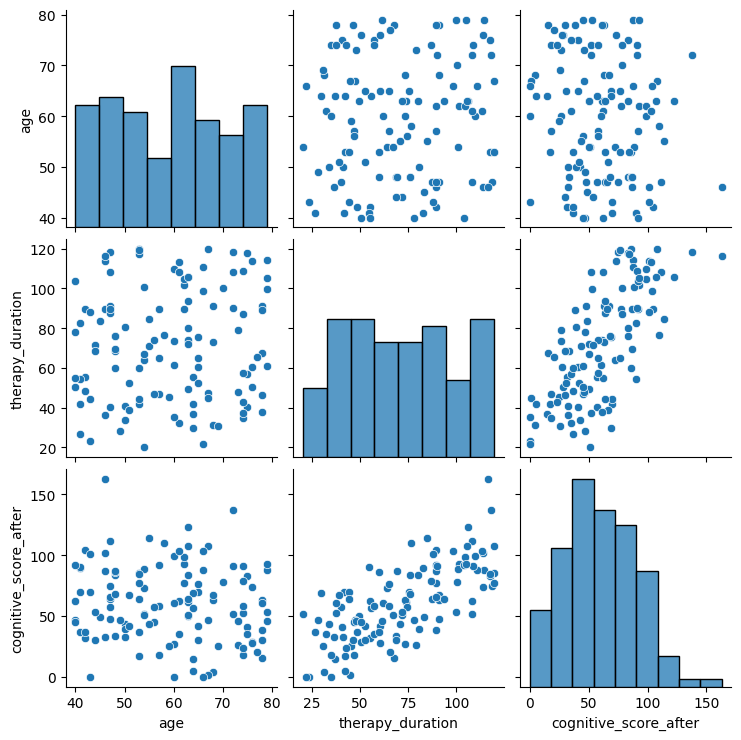

In [32]:
sns.pairplot(data)

## Why Split Data?

When building predictive models, we want to ensure our model works well on **unseen patients** (not just the data we trained on).  
- If we only measure performance on the training data, we risk **overfitting**--building a model that memorizes, not generalizes.
- **Validation sets** help us tune model choices (degree of polynomial, regularisation, etc.) without peeking at the test data.
- **Test sets** give a final, unbiased estimate of how well our model will perform on new patients.

A common way to split the data is:
- 80% Training Data
- 10% Validation
- 10% Test

However other splits, such as 90% Training data, is also common. Additionally if there's no need for tuning of the model, the Validation set is often left out (as we have done in the previous example).

![Train-Validation-Test Split](./imgs/train_val_test.png)

In [ ]:
# Features and outcome
X = data[["therapy_duration"]].values.flatten()  # Flatten to 1D array
y = data["cognitive_score_after"].values

# Train-test split (80-20)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=40)

# Validation-test split (50-50 from remaining 20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print dataset sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 96
Validation set size: 12
Test set size: 12


## Loss Function Optimization

- **Beyond Closed-Form Solutions**
  - Many machine learning models lack direct mathematical solutions and require iterative optimization to find good parameters

- **Iterative Optimization Process**
  - Start with randomly initialized parameters
  - Gradually improve them using a defined loss function (e.g., RMSE)

- **Role of Data Splitting**
  - Training set learns parameters, validation set monitors overfitting during optimization, and test set provides final unbiased evaluation

We'll demonstrate with linear regression using iterative optimization instead of the direct solution, showing how gradient descent improves model fit over iterations

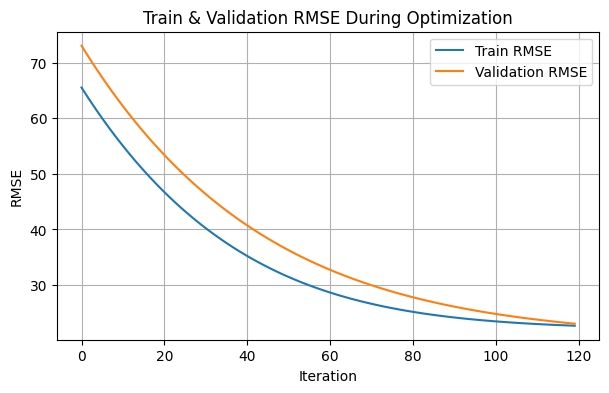

Final Train RMSE:      22.670
Final Validation RMSE: 22.992
Final Test RMSE:       28.930


In [34]:
# We Normalize the data for numerical stability
X_norm = normalize(X)
X_train_norm = normalize(X_train)
X_val_norm = normalize(X_val)
X_test_norm = normalize(X_test)

# Initialize parameters
n_iter = 120

w0, w1, w0_history, w1_history, rmse_train_history = train_linear_regression(X_train_norm, y_train, X_val_norm, y_val, n_iter=n_iter)

# Final RMSEs
y_pred_train_final = w0 + w1 * X_train_norm
y_pred_val_final = w0 + w1 * X_val_norm
y_pred_test_final = w0 + w1 * X_test_norm

rmse_train_final = np.sqrt(np.mean((y_pred_train_final - y_train) ** 2))
rmse_val_final = np.sqrt(np.mean((y_pred_val_final - y_val) ** 2))
rmse_test_final = np.sqrt(np.mean((y_pred_test_final - y_test) ** 2))

print(f"Final Train RMSE:      {rmse_train_final:.3f}")
print(f"Final Validation RMSE: {rmse_val_final:.3f}")
print(f"Final Test RMSE:       {rmse_test_final:.3f}")

The plot shows RMSE decreasing steadily for both training and validation sets as parameters are updated.

- **Key Observations**
  - Both training and validation RMSE follow similar downward trends
  - No significant gap indicates the model is not overfitting during training

- **Performance Comparison**
  - Final RMSE values provided for training, validation, and test datasets
  - Allows assessment of model generalization to completely unseen data

We'll plot regression lines at different training steps to see how the fit improves over iterations.

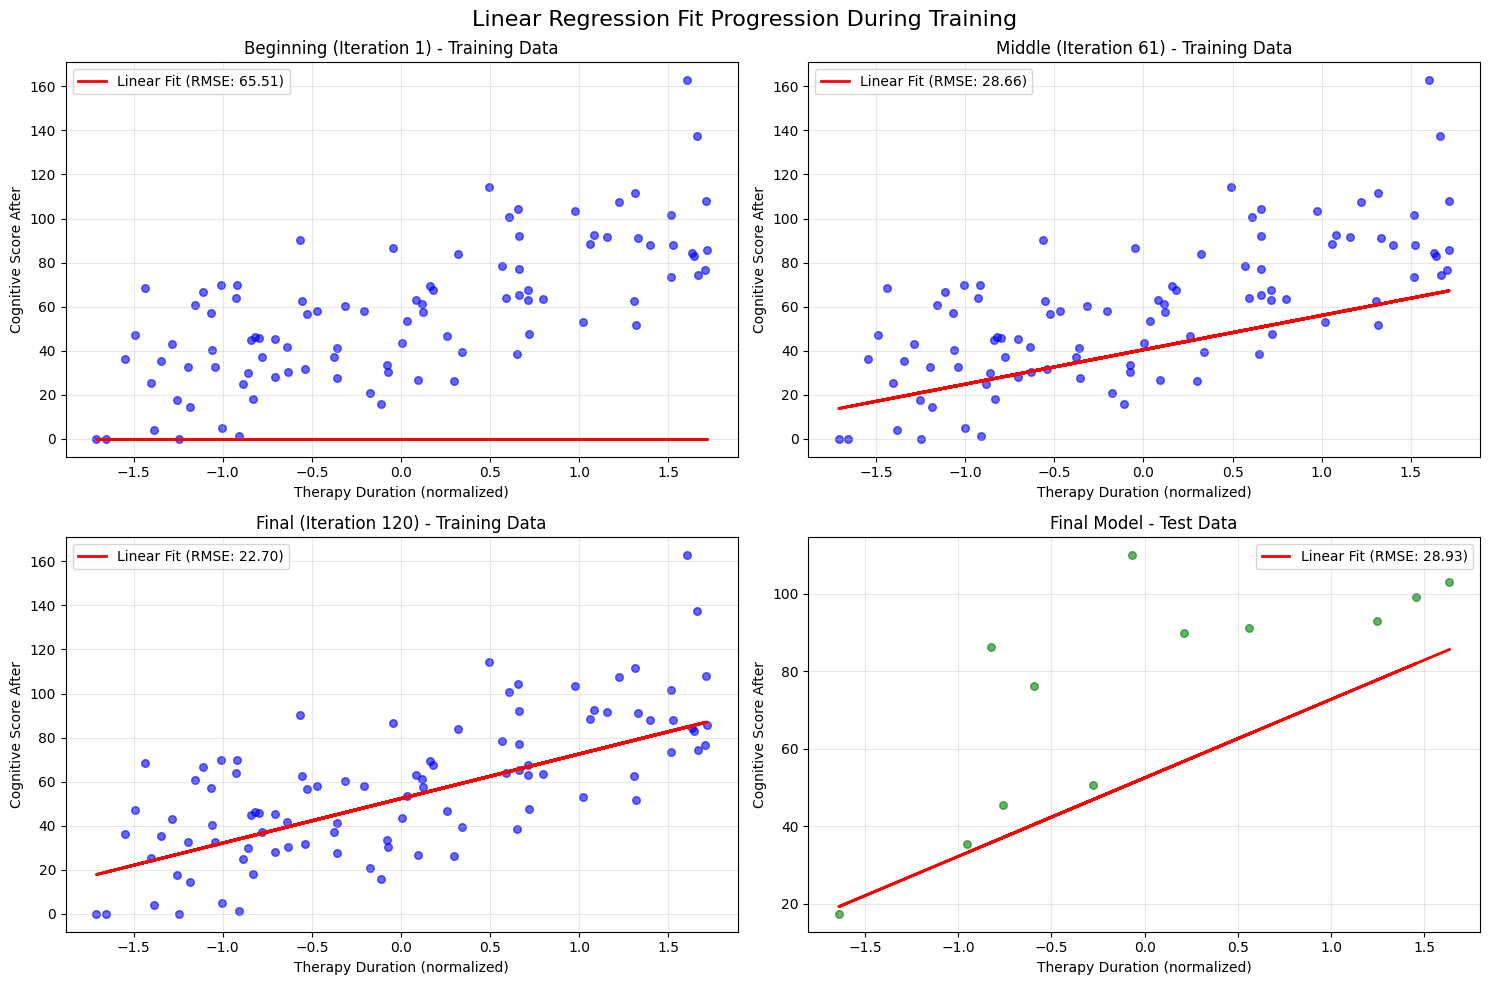

In [35]:
# Create subplots to show progression of fit
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Linear Regression Fit Progression During Training', fontsize=16)

# Define which iterations to show
iterations_to_show = [0, n_iter//2, n_iter-1]  # Beginning, middle, last iteration
iteration_labels = ['Beginning (Iteration 1)', f'Middle (Iteration {n_iter//2 + 1})', f'Final (Iteration {n_iter})']

# Plot training progression in first 3 subplots
for i, (iter_idx, label) in enumerate(zip(iterations_to_show, iteration_labels)):
    ax = axes[i//2, i%2]
    
    # Get parameters at this iteration
    w0_iter = w0_history[iter_idx]
    w1_iter = w1_history[iter_idx]
    
    # Make predictions with parameters from this iteration
    y_pred_iter = w0_iter + w1_iter * X_train_norm
    rmse_iter = np.sqrt(np.mean((y_pred_iter - y_train) ** 2))
    
    # Plot data points and regression line
    ax.scatter(X_train_norm, y_train, alpha=0.6, color='blue', s=30)
    ax.plot(X_train_norm, y_pred_iter, color='red', linewidth=2, 
            label=f'Linear Fit (RMSE: {rmse_iter:.2f})')
    
    ax.set_title(f'{label} - Training Data', fontsize=12)
    ax.set_xlabel('Therapy Duration (normalized)')
    ax.set_ylabel('Cognitive Score After')
    ax.legend()
    ax.grid(True, alpha=0.3)

# Plot final model performance on test set in 4th subplot
ax = axes[1, 1]
ax.scatter(X_test_norm, y_test, alpha=0.6, color='green', s=30)
ax.plot(X_test_norm, y_pred_test_final, color='red', linewidth=2, 
        label=f'Linear Fit (RMSE: {rmse_test_final:.2f})')

ax.set_title('Final Model - Test Data', fontsize=12)
ax.set_xlabel('Therapy Duration (normalized)')
ax.set_ylabel('Cognitive Score After')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

- **Beginning (Iteration 1)**
  - Poor fit with high RMSE (65.51) due to random parameter initialization
  - Regression line shows minimal relationship capture

- **Middle Progress (Iteration 61)**
  - Significant improvement as gradient descent finds better parameters
  - RMSE drops to 28.66, showing effective learning

- **Final Training (Iteration 120)**
  - Best fit achieved after convergence with RMSE of 22.70
  - Model has learned the optimal parameters for the training data

- **Final test Performance**
  - RMSE of 28.93 on completely unseen test data
  - Slightly higher than training RMSE, indicating good generalization without severe overfitting

**Key Insights:**

- **Gradient Descent Effectiveness** - The progression demonstrates how iterative optimization successfully improves model fit over time

- **Optimization Analysis** - This visualization helps evaluate algorithm effectiveness and identify potential issues like slow convergence or oscillations

- **Hyperparameter Guidance** - Observing the optimization trajectory aids in fine-tuning learning rates and iteration counts

Next we'll explore how these parameter updates navigate the underlying loss landscape to understand the optimization process at a deeper level.

Closed-form Optimum: w0 = 60.342, w1 = 22.224
RMSE of Closed-form Optimum: 21.731


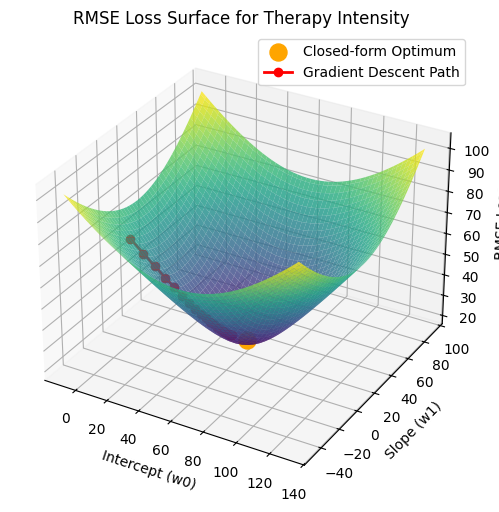

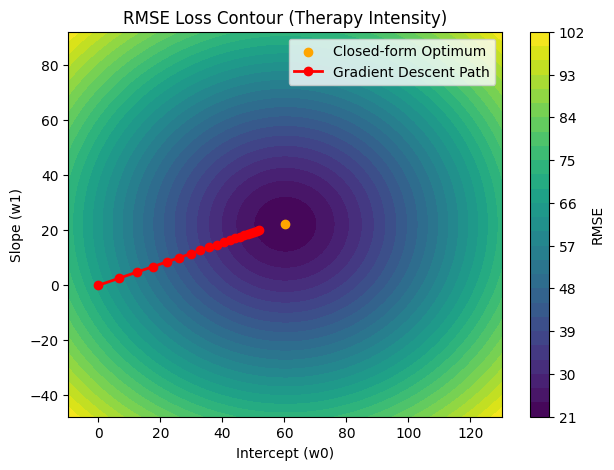

In [36]:
w0_history_ds, w1_history_ds, rmse_train_history_ds = downsample_history(w0_history, w1_history, rmse_train_history, k=6)

plot_rmse_loss_surface_with_arrow(X_norm, y, w0_history_ds, w1_history_ds, rmse_train_history_ds)

## Loss Surface Visualization

- **Understanding the Optimization Landscape**
  - The 3D surface and contour plots show how RMSE varies with different parameter combinations (intercept w0 and slope w1)
  - Dark blue regions represent low loss (good fits), while yellow regions show high loss (poor fits)

- **Gradient Descent Path**
  - **Red line with dots** shows the incremental steps taken during optimization
  - We plot a dot for each sixth iteration, moving from high loss toward the minimum
  - Path demonstrates how gradient descent navigates the loss landscape efficiently

- **Key Observations**
  - **Orange dot** marks the closed-form optimum (analytical solution)
  - Gradient descent successfully converges very close to this optimal point
  - The bowl-shaped surface confirms linear regression has a single global minimum, this is not guaranteed with more complex loss landscapes.

---